<a href="https://colab.research.google.com/github/Arturchik27/ML/blob/main/%D0%9B%D0%B0%D0%B1%D0%B0%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/winequality-red.csv")

''' Введем дополнительный параметр reviews, показывающий, что вино хорошего качества в случае значения "1"
или вино плохого качества в случае значения "0". Вино будем считать хорошим в случае значения quality > 6.5 '''

def reviews(row):
    if row.quality > 6.5:
        return 1
    else: 
        return 0
df['reviews'] = df.apply(reviews, axis=1)
df['reviews'].value_counts()

0    1382
1     217
Name: reviews, dtype: int64

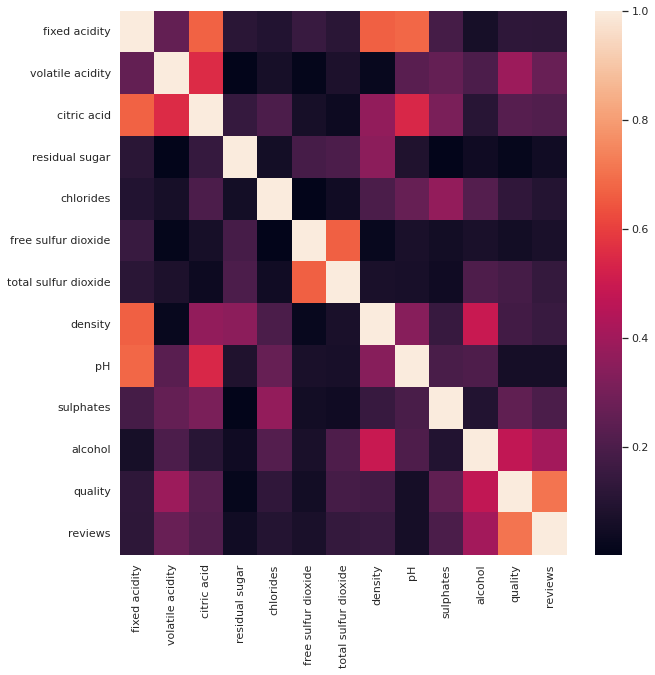

In [ ]:
# Картинку отрисуем с помощью библиотеки seaborn
import seaborn as sns
# Подсчитаем корреляцию и возьмем модуль от нее
corr = df.corr().abs()
# Следующая команда устанавливает размер картинки (по умолчанию она довольно маленькая)
sns.set(rc={'figure.figsize':(10, 10)})
# Нарисуем картинку
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Посмотрим тип изначальных данных

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
reviews                   int64
dtype: object

Построим гистограмму распределения вина по значению "качество"

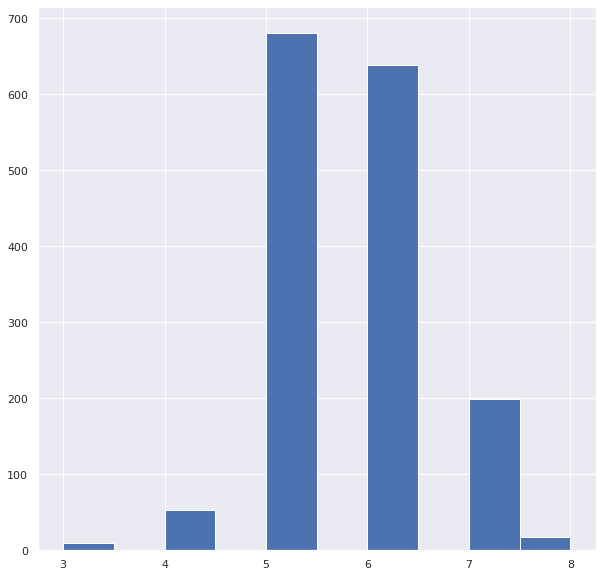

In [ ]:
df['quality'].hist()

Посчитаем для наглядности коэффициент корреляции между значениями 'fixed acidity' и 'density'

In [ ]:
np.corrcoef(df['fixed acidity'], df['density'])

array([[1.        , 0.66804729],
       [0.66804729, 1.        ]])

Переходим к машинному обучению

In [ ]:
X = df[df.columns[:-1]]
y = df['reviews']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Импортируем класс классификатора по ближайшим соседям
from sklearn.neighbors import KNeighborsClassifier

# Создадим наш классификатор. Гиперпараметр у этого алгоритма один - количество соседей.
clf = KNeighborsClassifier(n_neighbors=5)
# Обучим классификатор на тренировочной выборке
clf.fit(X_train, y_train)
# Подсчитаем долю верных ответов алгоритма на тестовой выборке.
print('Accuracy score: {}'.format(clf.score(X_test, y_test)))

Accuracy score: 0.8975


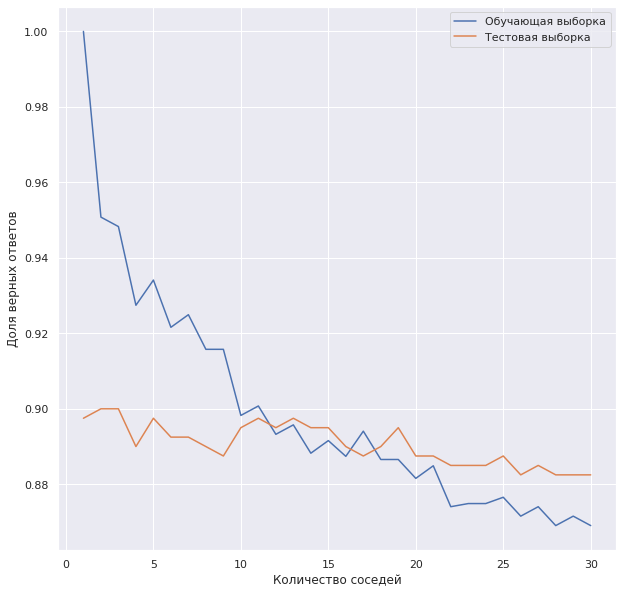

In [ ]:
'''Создадим пустой словарь. Будем добавлять в него значения наших "скоров". Ключами будет значение гиперпараметра,
значениями - качество работы. Рассмотрим отдельно качество на тренировочной выборке и на тестовой.'''
train_scores = {}
test_scores = {}

# Для n в диапазоне от 1 до 30 включительно
for n in range(1, 31):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    # Значение качества на текущей итерации:
    current_train_score = clf.score(X_train, y_train)
    current_test_score = clf.score(X_test, y_test)
    # Запишем его в наши словари
    train_scores[n] = current_train_score
    test_scores[n] = current_test_score

# Нарисуем графики
plt.plot(list(train_scores.keys()), list(train_scores.values()), label='Обучающая выборка')
plt.plot(list(test_scores.keys()), list(test_scores.values()), label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

По полученному графику видно, что обучающая выборка практически "совпадает" с тестовой выборкой при количестве соседей от 10 до 20. Полученная доля верных ответов алгоритма на тестовой выборке составляет примерно 0.9